In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
measure_repl = {
    'hitop_sum':'HiTOP Sum',
    'baars_sum': 'BAARS Sum',
    'phq_sum': 'PHQ-8 Sum',
    'gad_sum': 'GAD-7 Sum',
    'baars_inattention_sum': 'BAARS: Inattention',
    'baars_hyperactivity_sum': 'BAARS: Hyperactivity',
    'baars_impulsivity_sum': 'BAARS: Impulsivity',
    'baars_sct_sum': 'BAARS: Sluggish Cognitive Tempo',
    'hitop_anhedonic_depression': 'HiTOP: Anhedonic Depression',
    'hitop_anxious_worry': 'HiTOP: Anxious Worry',
    'hitop_appetite_gain': 'HiTOP: Appetite Gain',
    'hitop_appetite_loss': 'HiTOP: Appetite Loss',
    'hitop_cognitive_problems': 'HiTOP: Cognitive Problems',
    'hitop_hyposomnia': 'HiTOP: Hyposomnia',
    'hitop_indecisiveness': 'HiTOP: Indecisiveness', 
    'hitop_insomnia': 'HiTOP: Insomnia', 
    'hitop_panic': 'HiTOP: Panic',
    'hitop_separation_insecurity': 'HiTOP: Separation Insecurity',
    'hitop_shame_guilt': 'HiTOP: Shame/Guilt',
    'hitop_situational_phobia': 'HiTOP: Situational Phobia', 
    'hitop_social_anxiety': 'HiTOP: Social Anxiety',
    'hitop_well_being': 'HiTOP: Well Being'
}


# Load and munge General data
gdat = pd.read_csv('../results/ICC_general_removedGRIDchecks.csv')
gdat['sample'] = 'General'

gdat['l95'] = gdat['CI95%'].str.split(' ').str[0].str.strip('[').astype(float)
gdat['u95'] = gdat['CI95%'].str.split(' ').str[1].str.strip(']')
gdat.loc[gdat.u95 == '', 'u95'] = gdat.loc[gdat.u95 == '', 'CI95%'].str.split(' ').str[-1].str.strip(']')
gdat['u95'] = gdat.u95.astype(float)
gdat['Measure'] = gdat.Measure.replace(measure_repl)
total_measures = ['HiTOP Sum']
gdat_tot = gdat.loc[gdat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
gdat_tot['Total'] = True
gdat_other = gdat.loc[~gdat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
gdat_other['Total'] = False

gdat = pd.concat([gdat_tot, gdat_other]).reset_index(drop=True)
gdat['ypos'] = len(gdat) - gdat.index.values


In [6]:
gdat

,Measure,Type,Description,ICC,F,df1,df2,pval,CI95%,sample,l95,u95,Total,ypos
0,HiTOP Sum,ICC2,Single random raters,0.926,26.121,397,397,0.0,[0.91 0.94],General,0.91,0.94,True,22
1,HiTOP: Social Anxiety,ICC2,Single random raters,0.898,18.532,397,397,0.0,[0.88 0.92],General,0.88,0.92,False,21
2,BAARS Sum,ICC2,Single random raters,0.892,17.509,397,397,0.0,[0.87 0.91],General,0.87,0.91,False,20
3,HiTOP: Anhedonic Depression,ICC2,Single random raters,0.889,17.160,397,397,0.0,[0.87 0.91],General,0.87,0.91,False,19
4,PHQ-8 Sum,ICC2,Single random raters,0.885,16.361,397,397,0.0,[0.86 0.9 ],General,0.86,0.90,False,18
5,HiTOP: Anxious Worry,ICC2,Single random raters,0.884,16.232,397,397,0.0,[0.86 0.9 ],General,0.86,0.90,False,17
6,HiTOP: Cognitive Problems,ICC2,Single random raters,0.880,15.692,397,397,0.0,[0.86 0.9 ],General,0.86,0.90,False,16
7,HiTOP: Well Being,ICC2,Single random raters,0.874,14.815,397,397,0.0,[0.85 0.9 ],General,0.85,0.90,False,15
8,BAARS: Sluggish Cognitive Tempo,ICC2,Single random raters,0.868,14.159,397,397,0.0,[0.84 0.89],General,0.84,0.89,False,14
9,GAD-7 Sum,ICC2,Single random raters,0.860,13.272,397,397,0.0,[0.83 0.88],General,0.83,0.88,False,13


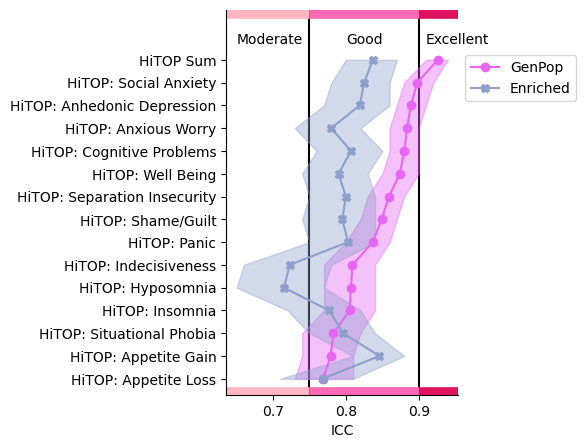

In [9]:
measure_repl = {
    'hitop_sum':'HiTOP Sum',
    'hitop_anhedonic_depression': 'HiTOP: Anhedonic Depression',
    'hitop_anxious_worry': 'HiTOP: Anxious Worry',
    'hitop_appetite_gain': 'HiTOP: Appetite Gain',
    'hitop_appetite_loss': 'HiTOP: Appetite Loss',
    'hitop_cognitive_problems': 'HiTOP: Cognitive Problems',
    'hitop_hyposomnia': 'HiTOP: Hyposomnia',
    'hitop_indecisiveness': 'HiTOP: Indecisiveness', 
    'hitop_insomnia': 'HiTOP: Insomnia', 
    'hitop_panic': 'HiTOP: Panic',
    'hitop_separation_insecurity': 'HiTOP: Separation Insecurity',
    'hitop_shame_guilt': 'HiTOP: Shame/Guilt',
    'hitop_situational_phobia': 'HiTOP: Situational Phobia', 
    'hitop_social_anxiety': 'HiTOP: Social Anxiety',
    'hitop_well_being': 'HiTOP: Well Being'
}


# Load and munge General data
gdat = pd.read_csv('../results/ICC_general_removedGRIDchecks.csv')
gdat['sample'] = 'General'

gdat['l95'] = gdat['CI95%'].str.split(' ').str[0].str.strip('[').astype(float)
gdat['u95'] = gdat['CI95%'].str.split(' ').str[1].str.strip(']')
gdat.loc[gdat.u95 == '', 'u95'] = gdat.loc[gdat.u95 == '', 'CI95%'].str.split(' ').str[-1].str.strip(']')
gdat['u95'] = gdat.u95.astype(float)

gdat = gdat[~gdat.Measure.isin(['baars_sum', 'phq_sum', 'gad_sum', 'baars_inattention_sum', 'baars_hyperactivity_sum', 'baars_impulsivity_sum', 'baars_sct_sum'])]

gdat['Measure'] = gdat.Measure.replace(measure_repl)
total_measures = ['HiTOP Sum']
gdat_tot = gdat.loc[gdat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
gdat_tot['Total'] = True
gdat_other = gdat.loc[~gdat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
gdat_other['Total'] = True

gdat = pd.concat([gdat_tot, gdat_other]).reset_index(drop=True)
gdat['ypos'] = len(gdat) - gdat.index.values


# load and munge enriched data
edat = pd.read_csv('../results/ICC_highrisk_removedGRIDchecks.csv')
edat['sample'] = 'Enriched'

edat['l95'] = edat['CI95%'].str.split(' ').str[0].str.strip('[').astype(float)
edat['u95'] = edat['CI95%'].str.split(' ').str[1].str.strip(']')
edat.loc[edat.u95 == '', 'u95'] = edat.loc[edat.u95 == '', 'CI95%'].str.split(' ').str[-1].str.strip(']')
edat['u95'] = edat.u95.astype(float)

edat = edat[~edat.Measure.isin(['baars_sum', 'phq_sum', 'gad_sum', 'baars_inattention_sum', 'baars_hyperactivity_sum', 'baars_impulsivity_sum', 'baars_sct_sum'])]

edat['Measure'] = edat.Measure.replace(measure_repl)
total_measures = ['HiTOP Sum']
edat_tot = edat.loc[edat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
edat_tot['Total'] = True
edat_other = edat.loc[~edat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
edat_other['Total'] = True

edat = pd.concat([edat_tot, edat_other]).reset_index(drop=True)
edat = edat.merge(gdat.loc[:, ['Measure', 'ypos']], how='left')
edat = edat.sort_values('ypos')

general_line_color = sns.color_palette('husl')[5]
enriched_line_color = sns.color_palette('Set2')[2]

# draw Plot
fig, ax = plt.subplots(1, figsize=(3,5))

# plot ICC Scale sums for general sample
ax.plot(gdat.query('Total').ICC, gdat.query('Total').ypos, color=general_line_color, label='GenPop', marker='o')
ax.set_yticks(gdat.ypos)
ax.set_yticklabels(gdat.Measure)
# plot error fill between for scale sums for general sample
ax.fill_betweenx(gdat.query('Total').ypos, gdat.query('Total').l95, gdat.query('Total').u95, color=general_line_color, alpha=0.4)

# plot all others for general sample
ax.plot(gdat.query('not Total').ICC, gdat.query('not Total').ypos, color=general_line_color, marker='o')
ax.set_yticks(gdat.ypos)
ax.set_yticklabels(gdat.Measure)
# plot error fill between for other scales for general sample
ax.fill_betweenx(gdat.query('not Total').ypos, gdat.query('not Total').l95, gdat.query('not Total').u95, color=general_line_color, alpha=0.4)


# plot ICC Scale sums for general sample
ax.plot(edat.query('Total').ICC, edat.query('Total').ypos, color=enriched_line_color, label='Enriched', marker='X')
ax.set_yticks(edat.ypos)
ax.set_yticklabels(edat.Measure)
# plot error fill between for scale sums for general sample
ax.fill_betweenx(edat.query('Total').ypos, edat.query('Total').l95, edat.query('Total').u95, color=enriched_line_color, alpha=0.4)

# plot all others for general sample
ax.plot(edat.query('not Total').ICC, edat.query('not Total').ypos, color=enriched_line_color, marker='X')
ax.set_yticks(edat.ypos)
ax.set_yticklabels(edat.Measure)
# plot error fill between for other scales for general sample
ax.fill_betweenx(edat.query('not Total').ypos, edat.query('not Total').l95, edat.query('not Total').u95, color=enriched_line_color, alpha=0.4)

ax.set_xlabel('ICC')

# add indicators for moderate and good ICC
yll, yul = ax.get_ylim()
yul = yul + 1.5
xll, xul = ax.get_xlim()
ax.hlines([yll, yul], [xll, xll], [0.75,0.75], color='#FFB6C1', lw=12)
ax.hlines([yll, yul], [0.75, 0.75], [0.9,0.9], color='#FF69B4', lw=12)
ax.hlines([yll, yul], [0.9, 0.9], [xul,xul], color='#E0115F', lw=12)
ax.vlines([0.75, 0.9],[yll, yll], [yul, yul], color='black', zorder=-1)
# add annotations for ICC ranges
ax.text(0.65, yul-1.5, 'Moderate')
ax.text(0.8, yul-1.5, 'Good')
ax.text(0.91, yul-1.5, 'Excellent')

ax.set_ylim((yll, yul))
ax.set_xlim((xll, xul))

ax.legend(loc='upper left', bbox_to_anchor=(1,0.9))
sns.despine(fig)

In [10]:
bothdat = pd.read_csv('../results/ICC_genpopANDenriched_removedGRIDchecks.csv')
bothdat['sample'] = 'Combined'
bothdat.head()

,Measure,Type,Description,ICC,F,df1,df2,pval,CI95%,sample
0,hitop_sum,ICC2,Single random raters,0.927,26.457,433,433,0.0,[0.91 0.94],Combined
1,baars_sum,ICC2,Single random raters,0.889,16.992,433,433,0.0,[0.87 0.91],Combined
2,phq_sum,ICC2,Single random raters,0.897,18.370,433,433,0.0,[0.88 0.91],Combined
3,gad_sum,ICC2,Single random raters,0.860,13.218,433,433,0.0,[0.83 0.88],Combined
4,baars_inattention_sum,ICC2,Single random raters,0.869,14.210,433,433,0.0,[0.84 0.89],Combined


In [11]:
bothdat['sample'].value_counts()

Combined    22
Name: sample, dtype: int64

In [15]:
bothdat['l95'] = bothdat['CI95%'].str.split(' ').str[0].str.strip('[').astype(float)
bothdat['u95'] = bothdat['CI95%'].str.split(' ').str[1].str.strip(']')
bothdat.loc[bothdat.u95 == '', 'u95'] = bothdat.loc[bothdat.u95 == '', 'CI95%'].str.split(' ').str[-1].str.strip(']')
bothdat['u95'] = bothdat.u95.astype(float)

bothdat = bothdat[~bothdat.Measure.isin(['baars_sum', 'phq_sum', 'gad_sum', 'baars_inattention_sum', 'baars_hyperactivity_sum', 'baars_impulsivity_sum', 'baars_sct_sum'])]

bothdat['Measure'] = bothdat.Measure.replace(measure_repl)
total_measures = ['HiTOP Sum', 'BAARS Sum', 'PHQ-8 Sum', 'GAD-7 Sum']
bothdat_tot = bothdat.loc[bothdat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
bothdat_tot['Total'] = True
bothdat_other = bothdat.loc[~bothdat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
bothdat_other['Total'] = True

bothdat = pd.concat([bothdat_tot, bothdat_other]).reset_index(drop=True)
bothdat['ypos'] = len(bothdat) - bothdat.index.values

In [16]:
both_line_color = sns.color_palette('husl')[4]

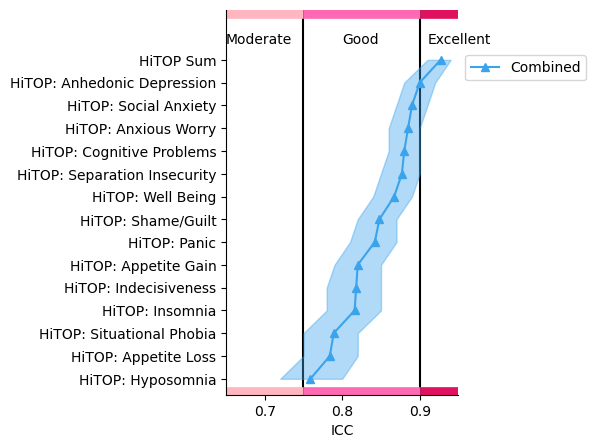

In [17]:
# draw Plot
fig, ax = plt.subplots(1, figsize=(3,5))

# plot ICC Scale sums for both
ax.plot(bothdat.query('Total').ICC, bothdat.query('Total').ypos, color=both_line_color, label='Combined', marker='^')
ax.set_yticks(bothdat.ypos)
ax.set_yticklabels(bothdat.Measure)
# plot error fill between for scale sums for general sample
ax.fill_betweenx(bothdat.query('Total').ypos, bothdat.query('Total').l95, bothdat.query('Total').u95, color=both_line_color, alpha=0.4)

# plot all others for both
ax.plot(bothdat.query('not Total').ICC, bothdat.query('not Total').ypos, color=both_line_color, marker='^')
ax.set_yticks(bothdat.ypos)
ax.set_yticklabels(bothdat.Measure)

# plot error fill between for other scales for both
ax.fill_betweenx(bothdat.query('not Total').ypos, bothdat.query('not Total').l95, bothdat.query('not Total').u95, color=both_line_color, alpha=0.4)

ax.set_xlabel('ICC')

# add indicators for moderate and good ICC
yll, yul = ax.get_ylim()
yul = yul + 1.5
xll, xul = ax.get_xlim()
ax.hlines([yll, yul], [0.65, 0.65], [0.75,0.75], color='#FFB6C1', lw=12)
ax.hlines([yll, yul], [0.75, 0.75], [0.9,0.9], color='#FF69B4', lw=12)
ax.hlines([yll, yul], [0.9, 0.9], [xul,xul], color='#E0115F', lw=12)
ax.vlines([0.75, 0.9],[yll, yll], [yul, yul], color='black', zorder=-1)
# add annotations for ICC ranges
ax.text(0.65, yul-1.5, 'Moderate')
ax.text(0.8, yul-1.5, 'Good')
ax.text(0.91, yul-1.5, 'Excellent')

ax.set_ylim((yll, yul))
ax.set_xlim((0.65, 0.95))

#ax.xlim(0.65, 0.95)

ax.legend(loc='upper left', bbox_to_anchor=(1,0.9))
sns.despine(fig)

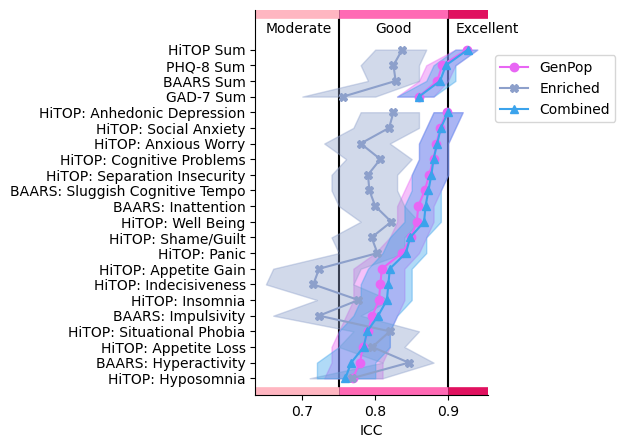

In [48]:
# combining all

measure_repl = {
    'hitop_sum':'HiTOP Sum',
    'baars_sum': 'BAARS Sum',
    'phq_sum': 'PHQ-8 Sum',
    'gad_sum': 'GAD-7 Sum',
    'baars_inattention_sum': 'BAARS: Inattention',
    'baars_hyperactivity_sum': 'BAARS: Hyperactivity',
    'baars_impulsivity_sum': 'BAARS: Impulsivity',
    'baars_sct_sum': 'BAARS: Sluggish Cognitive Tempo',
    'hitop_anhedonic_depression': 'HiTOP: Anhedonic Depression',
    'hitop_anxious_worry': 'HiTOP: Anxious Worry',
    'hitop_appetite_gain': 'HiTOP: Appetite Gain',
    'hitop_appetite_loss': 'HiTOP: Appetite Loss',
    'hitop_cognitive_problems': 'HiTOP: Cognitive Problems',
    'hitop_hyposomnia': 'HiTOP: Hyposomnia',
    'hitop_indecisiveness': 'HiTOP: Indecisiveness', 
    'hitop_insomnia': 'HiTOP: Insomnia', 
    'hitop_panic': 'HiTOP: Panic',
    'hitop_separation_insecurity': 'HiTOP: Separation Insecurity',
    'hitop_shame_guilt': 'HiTOP: Shame/Guilt',
    'hitop_situational_phobia': 'HiTOP: Situational Phobia', 
    'hitop_social_anxiety': 'HiTOP: Social Anxiety',
    'hitop_well_being': 'HiTOP: Well Being'
}

# Load and munge General data
gdat = pd.read_csv('../results/ICC_general_removedGRIDchecks.csv')
gdat['sample'] = 'General'

gdat['l95'] = gdat['CI95%'].str.split(' ').str[0].str.strip('[').astype(float)
gdat['u95'] = gdat['CI95%'].str.split(' ').str[1].str.strip(']')
gdat.loc[gdat.u95 == '', 'u95'] = gdat.loc[gdat.u95 == '', 'CI95%'].str.split(' ').str[-1].str.strip(']')
gdat['u95'] = gdat.u95.astype(float)
gdat['Measure'] = gdat.Measure.replace(measure_repl)
total_measures = ['HiTOP Sum', 'BAARS Sum', 'PHQ-8 Sum', 'GAD-7 Sum']
gdat_tot = gdat.loc[gdat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
gdat_tot['Total'] = True
gdat_other = gdat.loc[~gdat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
gdat_other['Total'] = False

gdat = pd.concat([gdat_tot, gdat_other]).reset_index(drop=True)
gdat['ypos'] = len(gdat) - gdat.index.values

# load and munge enriched data
edat = pd.read_csv('../results/ICC_highrisk_removedGRIDchecks.csv')
edat['sample'] = 'Enriched'

edat['l95'] = edat['CI95%'].str.split(' ').str[0].str.strip('[').astype(float)
edat['u95'] = edat['CI95%'].str.split(' ').str[1].str.strip(']')
edat.loc[edat.u95 == '', 'u95'] = edat.loc[edat.u95 == '', 'CI95%'].str.split(' ').str[-1].str.strip(']')
edat['u95'] = edat.u95.astype(float)
edat['Measure'] = edat.Measure.replace(measure_repl)
total_measures = ['HiTOP Sum', 'BAARS Sum', 'PHQ-8 Sum', 'GAD-7 Sum']
edat_tot = edat.loc[edat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
edat_tot['Total'] = True
edat_other = edat.loc[~edat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
edat_other['Total'] = False

edat = pd.concat([edat_tot, edat_other]).reset_index(drop=True)
edat = edat.merge(gdat.loc[:, ['Measure', 'ypos']], how='left')
edat = edat.sort_values('ypos')

# combined data
bothdat = pd.read_csv('../results/ICC_genpopANDenriched_removedGRIDchecks.csv')
bothdat['sample'] = 'Combined'

bothdat['l95'] = bothdat['CI95%'].str.split(' ').str[0].str.strip('[').astype(float)
bothdat['u95'] = bothdat['CI95%'].str.split(' ').str[1].str.strip(']')
bothdat.loc[bothdat.u95 == '', 'u95'] = bothdat.loc[bothdat.u95 == '', 'CI95%'].str.split(' ').str[-1].str.strip(']')
bothdat['u95'] = bothdat.u95.astype(float)
bothdat['Measure'] = bothdat.Measure.replace(measure_repl)
total_measures = ['HiTOP Sum', 'BAARS Sum', 'PHQ-8 Sum', 'GAD-7 Sum']
bothdat_tot = bothdat.loc[bothdat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
bothdat_tot['Total'] = True
bothdat_other = bothdat.loc[~bothdat.Measure.isin(total_measures)].copy().sort_values('ICC', ascending=False).reset_index(drop=True)
bothdat_other['Total'] = False

bothdat = pd.concat([bothdat_tot, bothdat_other]).reset_index(drop=True)
bothdat['ypos'] = len(bothdat) - bothdat.index.values

# lines colors

general_line_color = sns.color_palette('husl')[5]
enriched_line_color = sns.color_palette('Set2')[2]
both_line_color = sns.color_palette('husl')[4]

# draw Plot
fig, ax = plt.subplots(1, figsize=(3,5))

# plot ICC Scale sums for general sample
ax.plot(gdat.query('Total').ICC, gdat.query('Total').ypos, color=general_line_color, label='GenPop', marker='o')
ax.set_yticks(gdat.ypos)
ax.set_yticklabels(gdat.Measure)
# plot error fill between for scale sums for general sample
ax.fill_betweenx(gdat.query('Total').ypos, gdat.query('Total').l95, gdat.query('Total').u95, color=general_line_color, alpha=0.4)

# plot all others for general sample
ax.plot(gdat.query('not Total').ICC, gdat.query('not Total').ypos, color=general_line_color, marker='o')
ax.set_yticks(gdat.ypos)
ax.set_yticklabels(gdat.Measure)
# plot error fill between for other scales for general sample
ax.fill_betweenx(gdat.query('not Total').ypos, gdat.query('not Total').l95, gdat.query('not Total').u95, color=general_line_color, alpha=0.4)


# plot ICC Scale sums for enriched sample
ax.plot(edat.query('Total').ICC, edat.query('Total').ypos, color=enriched_line_color, label='Enriched', marker='X')
ax.set_yticks(edat.ypos)
ax.set_yticklabels(edat.Measure)
# plot error fill between for scale sums for general sample
ax.fill_betweenx(edat.query('Total').ypos, edat.query('Total').l95, edat.query('Total').u95, color=enriched_line_color, alpha=0.4)

# plot all others for enriched sample
ax.plot(edat.query('not Total').ICC, edat.query('not Total').ypos, color=enriched_line_color, marker='X')
ax.set_yticks(edat.ypos)
ax.set_yticklabels(edat.Measure)
# plot error fill between for other scales for general sample
ax.fill_betweenx(edat.query('not Total').ypos, edat.query('not Total').l95, edat.query('not Total').u95, color=enriched_line_color, alpha=0.4)

# plot ICC Scale sums for both
ax.plot(bothdat.query('Total').ICC, bothdat.query('Total').ypos, color=both_line_color, label='Combined', marker='^')
ax.set_yticks(bothdat.ypos)
ax.set_yticklabels(bothdat.Measure)
# plot error fill between for scale sums for general sample
ax.fill_betweenx(bothdat.query('Total').ypos, bothdat.query('Total').l95, bothdat.query('Total').u95, color=both_line_color, alpha=0.4)

# plot all others for both
ax.plot(bothdat.query('not Total').ICC, bothdat.query('not Total').ypos, color=both_line_color, marker='^')
ax.set_yticks(bothdat.ypos)
ax.set_yticklabels(bothdat.Measure)

# plot error fill between for other scales for both
ax.fill_betweenx(bothdat.query('not Total').ypos, bothdat.query('not Total').l95, bothdat.query('not Total').u95, color=both_line_color, alpha=0.4)

ax.set_xlabel('ICC')

# add indicators for moderate and good ICC
yll, yul = ax.get_ylim()
yul = yul + 1.5
xll, xul = ax.get_xlim()
ax.hlines([yll, yul], [xll, xll], [0.75,0.75], color='#FFB6C1', lw=12)
ax.hlines([yll, yul], [0.75, 0.75], [0.9,0.9], color='#FF69B4', lw=12)
ax.hlines([yll, yul], [0.9, 0.9], [xul,xul], color='#E0115F', lw=12)
ax.vlines([0.75, 0.9],[yll, yll], [yul, yul], color='black', zorder=-1)
# add annotations for ICC ranges
ax.text(0.65, yul-1.5, 'Moderate')
ax.text(0.8, yul-1.5, 'Good')
ax.text(0.91, yul-1.5, 'Excellent')

ax.set_ylim((yll, yul))
ax.set_xlim((xll, xul))

ax.legend(loc='upper left', bbox_to_anchor=(1,0.9))
sns.despine(fig)